In [2]:
#Implementing LSTM for the imdb dataset
from keras.datasets import imdb  # import the built-in imdb dataset in Keras

# Set the vocabulary size
vocabulary_size = 5000

# Load in training and test data (note the difference in convention compared to scikit-learn)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocabulary_size)
print("Loaded dataset with {} training samples, {} test samples".format(len(X_train), len(X_test)))

Loaded dataset with 25000 training samples, 25000 test samples


In [3]:
# Map word IDs back to words
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
#print("--- Review (with words) ---")
#print([id2word.get(i, " ") for i in X_train[7]]) # default of " " if i not present in dict keys
#print("--- Label ---")
#print(y_train[7])

In [4]:
X_len = [len(l) for l in X_train]
print("Min review length: {} and Max length: {}".format(min(X_len), max(X_len)))

Min review length: 11 and Max length: 2494


In [5]:
from keras.preprocessing import sequence

# Set the maximum number of words per document
max_words = 1600

# TODO: Pad sequences in X_train and X_test
X_train_pad = sequence.pad_sequences(X_train, maxlen=max_words, value=0)
X_test_pad = sequence.pad_sequences(X_test, maxlen=max_words, value=0)

In [6]:
print(X_train_pad.shape)


(25000, 1600)


In [7]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
model = Sequential()
#model.add(Embedding(vocabulary_size, 128, input_length=max_words))
model.add(Embedding(vocabulary_size, 300, input_length=max_words))
#model.add(LSTM(128))
model.add(LSTM(300))
#model.add(Dropout(0.5))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1600, 300)         1500000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 301       
Total params: 2,221,501.0
Trainable params: 2,221,501.0
Non-trainable params: 0.0
_________________________________________________________________
None


In [8]:

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
batch_size = 32
num_epochs = 3

validation_split=0.2

history=model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_split=validation_split)

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 8048s - loss: 0.5195 - acc: 0.7460 - val_loss: 0.6652 - val_acc: 0.6640
Epoch 2/3
20000/20000 [==============================] - 8096s - loss: 0.3888 - acc: 0.8261 - val_loss: 0.6561 - val_acc: 0.6208
Epoch 3/3
20000/20000 [==============================] - 8380s - loss: 0.3539 - acc: 0.8430 - val_loss: 0.3088 - val_acc: 0.8706


In [10]:
model.save("LSTM_IMDB_refined.h5")
model.save_weights("LSTM_IMDB_Weights_refined.h5")
#from keras.models import load_model
#model = load_model("LSTM_IMDB_moreDO.h5")

['acc', 'loss', 'val_acc', 'val_loss']


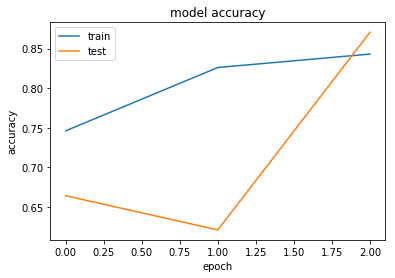

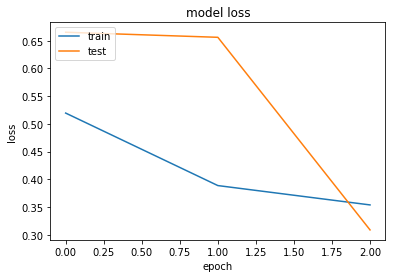

In [12]:
#scores = model.evaluate(X_test, y_test, verbose=0)
#print("Accuracy: %.2f%%" % (scores[1]*100))
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
y_pred=model.predict_classes(X_test_pad)

25000/25000 [==============================] - 2520s  


In [14]:
score,acc = model.evaluate(X_test_pad,y_test,verbose=2)

In [15]:
print score, acc
model.metrics_names

0.308366101627 0.86968


['loss', 'acc']

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [21]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')

Confusion matrix, without normalization
[[10393  2107]
 [ 1151 11349]]


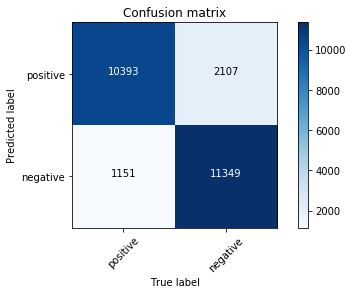

In [22]:
plot_confusion_matrix(cnf_matrix, classes=["positive","negative"], normalize=False)
plt.show()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       0.83      0.90      0.86     11544
          1       0.91      0.84      0.87     13456

avg / total       0.87      0.87      0.87     25000

